In [127]:
import os
import torch
if(not os.getcwd().endswith("EpiLLM")):
    os.chdir("..")
print(os.getcwd())
env = ! cat .env
try : 
    DIR = [_2.replace("\"", "") for (_1, _2) in [e.split("=") for e in env] if _1 == "DIR_PATH"][0]
except:
    print("Set the DIR in .env file")

/home/antoinemagron/smb_share/TeamMembers/Magron_Antoine/EpiLLM


In [128]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from evaluation import MCQBenchmark

In [129]:
BENCHMARKS_PATHS = {
    "MCQ" : "docs/benchmarks/mcq40/processed.json",
    "AES7" : "docs/benchmarks/self_assessment/aes7_processed.json",
    "AES8" :  "docs/benchmarks/self_assessment/aes8_processed.json",
}


human_accuracies = {
    "AES7" : sum([_["human_accuracy"] for _ in MCQBenchmark(BENCHMARKS_PATHS["AES7"], lambda x : x).mcq]) / 100,
    "AES8" : sum([_["human_accuracy"] for _ in MCQBenchmark(BENCHMARKS_PATHS["AES8"], lambda x : x).mcq]) / 100,
}

human_accuracies["AES"] = sum(s for b, s in human_accuracies.items()) / len(human_accuracies)

GPT_RES_AES7 = 0.41
GPT_RES_AES8 = 0.43

In [130]:
def process_mod_name(modname):
    return "-".join(modname.split("/")[1].split("-")[:2])

In [131]:
res1 = pd.read_csv("docs/benchmarks_results/meditron_llama_cot1_aes78_v1.csv").drop("Unnamed: 0", axis=1)
res2 = pd.read_csv("docs/benchmarks_results/meditron_llama_cot1_aes78_v2.csv").drop("Unnamed: 0", axis=1)
res3 = pd.read_csv("docs/benchmarks_results/meditron_llama_cot1_aes78_v3.csv").drop("Unnamed: 0", axis=1)

In [132]:
res1

,mod,temperature,top_k,top_p,max_tokens,presence_penalty,frequency_penalty,use_beam_search,logprobs,best_of,stop,use_vllm,AES7,AES8
0,epfl-llm/meditron-7b,0.2,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.32,0.30
1,epfl-llm/meditron-7b,0.8,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.36
2,epfl-llm/meditron-7b,1.0,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.33,0.34
3,epfl-llm/meditron-7b,1.2,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.36
4,meta-llama/Llama-2-7b-hf,0.2,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.24,0.26
5,meta-llama/Llama-2-7b-hf,0.8,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.23,0.26
6,meta-llama/Llama-2-7b-hf,1.0,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.25,0.27
7,meta-llama/Llama-2-7b-hf,1.2,1,1,512,0.0,1.0,False,5,1,<|STOP|>,True,0.23,0.25


/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bench"] = bench
/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bench"] = bench
/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

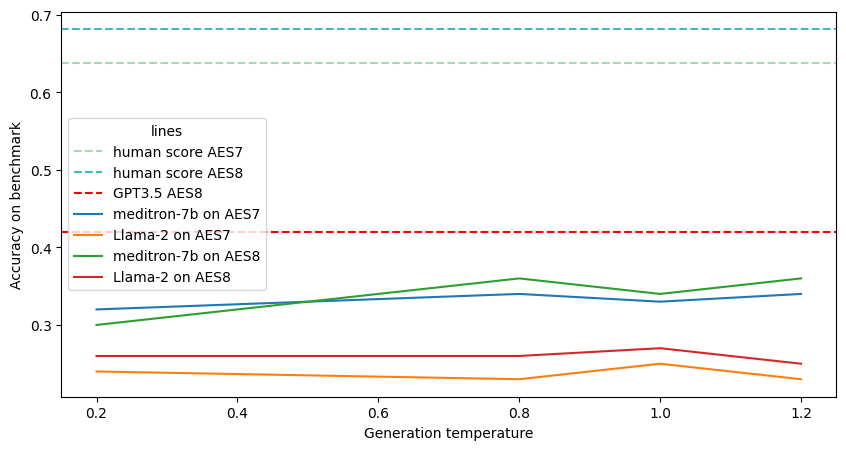

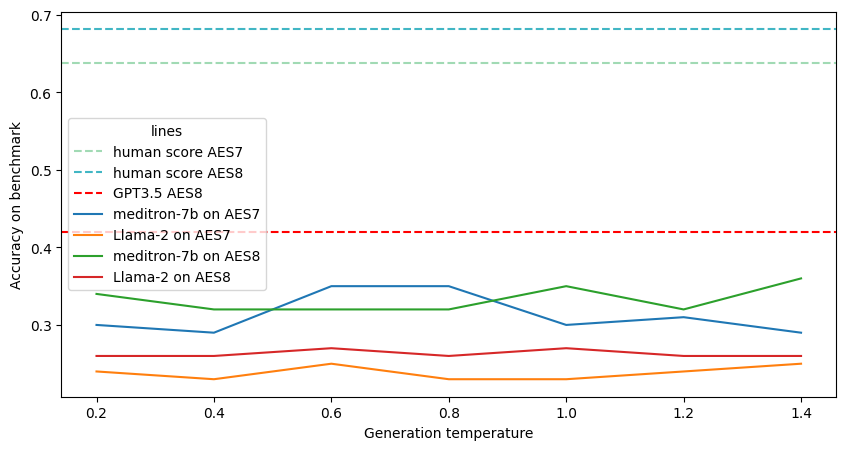

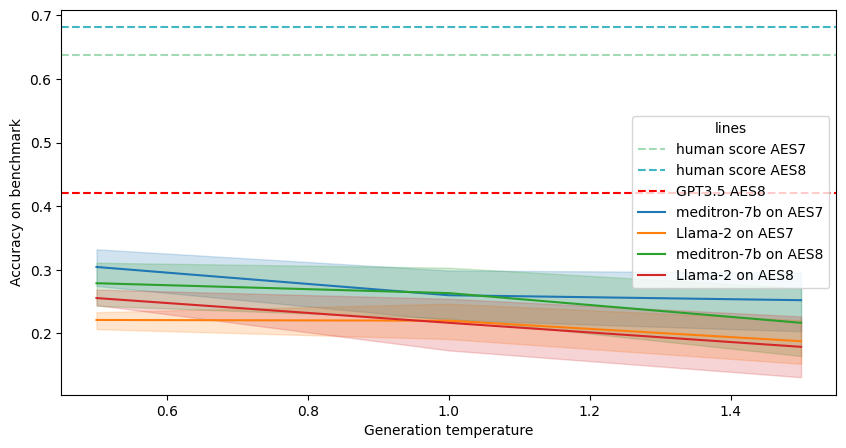

In [133]:
def perf_against_temp(df, benchnames=["AES7", "AES8"]):
    colors = ["#a1dab4", "#41b6c4", "#2c7fb8", "#253494", "#ffffcc"]
    temps = []
    for bench in benchnames:
        temp = df[["mod", bench, "temperature"]]
        temp["bench"] = bench
        temp.columns = ["mod", "accuracy", "temperature", "bench"]
        temps.append(temp)
    df = pd.concat(temps)

    df["lines"] = df["mod"].apply(process_mod_name) + " on " + df["bench"]
    
    f, a = plt.subplots(figsize=(10, 5))
    for bench, color in zip(benchnames, colors):
        a.axhline(human_accuracies[bench], linestyle="--", label=f"human score {bench} ", color=color)
    a.axhline((GPT_RES_AES7 + GPT_RES_AES8) / 2 , linestyle="--", label=f"GPT3.5 {bench} ", color="r")
    # a.axhline(0.2 , linestyle="--", label=f"chance", color="b")
    g = sns.lineplot(data=df, x="temperature", y="accuracy", hue="lines")
    g.set_xlabel("Generation temperature")
    g.set_ylabel("Accuracy on benchmark")
perf_against_temp(res1)    
perf_against_temp(res2)    
perf_against_temp(res3)    

In [134]:
# res3.iloc[res3.AES7.argmax()]
res3

,mod,temperature,top_k,top_p,max_tokens,presence_penalty,frequency_penalty,use_beam_search,logprobs,best_of,stop,use_vllm,AES7,AES8
0,epfl-llm/meditron-7b,0.5,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.38,0.32
1,epfl-llm/meditron-7b,1.0,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.32,0.36
2,epfl-llm/meditron-7b,1.5,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.32
3,epfl-llm/meditron-7b,0.5,1,0.9,512,0.0,1.0,False,5,1,<|STOP|>,True,0.32,0.34
4,epfl-llm/meditron-7b,1.0,1,0.9,512,0.0,1.0,False,5,1,<|STOP|>,True,0.36,0.31
5,epfl-llm/meditron-7b,1.5,1,0.9,512,0.0,1.0,False,5,1,<|STOP|>,True,0.33,0.31
6,epfl-llm/meditron-7b,0.5,1,0.5,512,0.0,1.0,False,5,1,<|STOP|>,True,0.30,0.35
7,epfl-llm/meditron-7b,1.0,1,0.5,512,0.0,1.0,False,5,1,<|STOP|>,True,0.30,0.32
8,epfl-llm/meditron-7b,1.5,1,0.5,512,0.0,1.0,False,5,1,<|STOP|>,True,0.32,0.29
9,epfl-llm/meditron-7b,0.5,5,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.26,0.25


### Average score for each AES and each model

In [135]:
from pathlib import Path
res_dir = Path(DIR) / "docs/benchmarks_results"
exps = pd.concat([pd.read_csv(x).drop("Unnamed: 0", axis=1).reset_index() for x in res_dir.glob("*") if x.is_file()])
exps["model"] = exps["mod"].apply(process_mod_name)
print("Number of exp : ", len(exps.drop_duplicates().index))

Number of exp :  96


<Axes: xlabel='model', ylabel='score'>

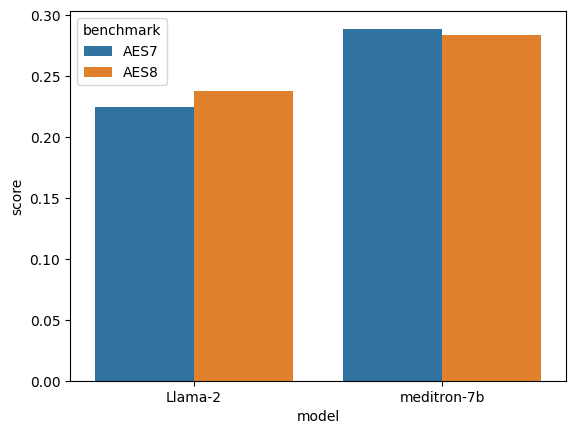

In [136]:
temp = exps[["model", "AES7", "AES8"]].groupby("model").mean().reset_index()
temp = pd.concat([
    pd.concat([temp[["model", "AES7"]].rename({"AES7": "score"}, axis=1), pd.DataFrame(["AES7"] * len(temp.index), columns=["benchmark"])], axis=1), 
    pd.concat([temp[["model", "AES8"]].rename({"AES8": "score"}, axis=1), pd.DataFrame(["AES8"] * len(temp.index), columns=["benchmark"])], axis=1)
])
sns.barplot(
    data=temp,
    x="model",
    y='score',
    hue="benchmark"
)

### Best params

/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bench"] = bench
/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bench"] = bench


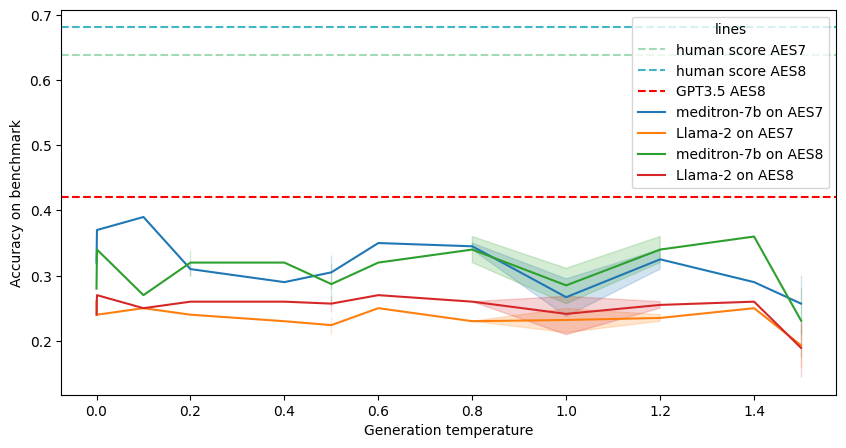

In [137]:
perf_against_temp(exps)

/tmp/ipykernel_4036646/449141598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bench"] = bench


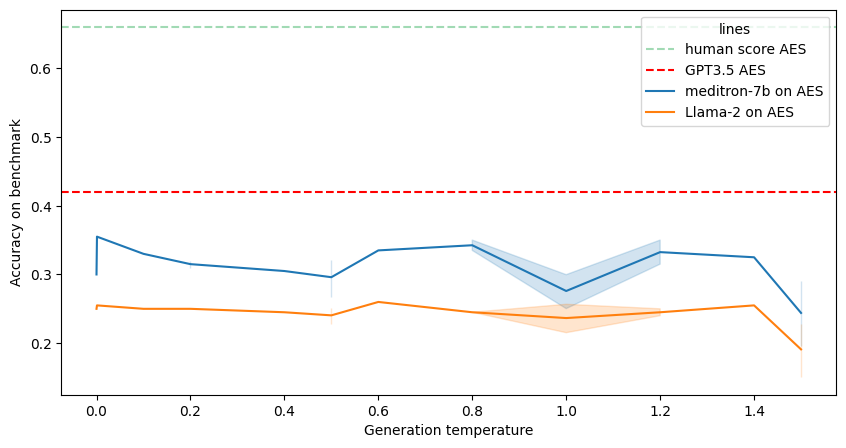

In [138]:
exps["AES"] = (exps["AES7"] + exps["AES8"]) / 2

perf_against_temp(exps, benchnames=["AES"])

In [139]:
exps.iloc[[exps.AES.argmax(), exps.AES7.argmax(), exps.AES8.argmax()]]

,index,mod,temperature,top_k,top_p,max_tokens,presence_penalty,frequency_penalty,use_beam_search,logprobs,best_of,stop,use_vllm,AES7,AES8,model,AES
0,0,epfl-llm/meditron-7b,0.001,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.37,0.34,meditron-7b,0.355
1,1,epfl-llm/meditron-7b,0.100,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.39,0.27,meditron-7b,0.330
1,1,epfl-llm/meditron-7b,0.800,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.36,meditron-7b,0.350


In [140]:
exps.sort_values("AES", ascending=False).iloc[:30]

,index,mod,temperature,top_k,top_p,max_tokens,presence_penalty,frequency_penalty,use_beam_search,logprobs,best_of,stop,use_vllm,AES7,AES8,model,AES
0,0,epfl-llm/meditron-7b,0.001,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.37,0.34,meditron-7b,0.355
3,3,epfl-llm/meditron-7b,1.200,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.36,meditron-7b,0.350
0,0,epfl-llm/meditron-7b,0.500,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.38,0.32,meditron-7b,0.350
1,1,epfl-llm/meditron-7b,0.800,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.34,0.36,meditron-7b,0.350
1,1,epfl-llm/meditron-7b,1.000,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.32,0.36,meditron-7b,0.340
2,2,epfl-llm/meditron-7b,1.000,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.33,0.34,meditron-7b,0.335
3,3,epfl-llm/meditron-7b,1.000,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.33,0.34,meditron-7b,0.335
2,2,epfl-llm/meditron-7b,0.500,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.31,0.36,meditron-7b,0.335
4,4,epfl-llm/meditron-7b,1.000,1,0.9,512,0.0,1.0,False,5,1,<|STOP|>,True,0.36,0.31,meditron-7b,0.335
2,2,epfl-llm/meditron-7b,0.600,1,1.0,512,0.0,1.0,False,5,1,<|STOP|>,True,0.35,0.32,meditron-7b,0.335
